# **Decision Trees and Random Forest Project: Predicting Potential Customers**

# **Marks: 60**

Welcome to the project on classification using Decision Tree and Random Forest.

--------------------------------
## **Context** 
-------------------------------

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market, would be worth $286.62bn by 2023, with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc., it is now preferable to traditional education. 

The online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as **leads**. There are various sources of obtaining leads for Edtech companies, like:

* The customer interacts with the marketing front on social media or other online platforms. 
* The customer browses the website/app and downloads the brochure.
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.


----------------------------
## **Objective**
-----------------------------


ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate the resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers. 
* Find the factors driving the lead conversion process.
* Create a profile of the leads which are likely to convert.


--------------------------
## **Data Description**
--------------------------

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.

* **ID:** ID of the lead
* **age:** Age of the lead
* **current_occupation:** Current occupation of the lead. Values include 'Professional', 'Unemployed', and 'Student'
* **first_interaction:** How did the lead first interact with ExtraaLearn? Values include 'Website' and 'Mobile App'
* **profile_completed:** What percentage of the profile has been filled by the lead on the website/mobile app? Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* **website_visits:** The number of times a lead has visited the website
* **time_spent_on_website:** Total time (seconds) spent on the website.
* **page_views_per_visit:** Average number of pages on the website viewed during the visits
* **last_activity:** Last interaction between the lead and ExtraaLearn 
    * **Email Activity:** Seeking details about the program through email, Representative shared information with a lead like a brochure of the program, etc.
    * **Phone Activity:** Had a phone conversation with a representative, had a conversation over SMS with a representative, etc.
    * **Website Activity:** Interacted on live chat with a representative, updated profile on the website, etc.

* **print_media_type1:** Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper
* **print_media_type2:** Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine
* **digital_media:** Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms
* **educational_channels:** Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* **referral:** Flag indicating whether the lead had heard about ExtraaLearn through reference.
* **status:** Flag indicating whether the lead was converted to a paid customer or not. The class 1 represents the paid customer and class 0 represents the unpaid customer.

## **Importing the necessary libraries and overview of the dataset**

In [1]:
import warnings
warnings.filterwarnings("ignore")

# Libraries for data manipulation and visualization
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree

from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, recall_score

from sklearn import metrics

# For hyperparameter tuning
from sklearn.model_selection import GridSearchCV

### **Loading the dataset**

In [2]:
learn = pd.read_csv("ExtraaLearn.csv")

In [3]:
# Copying data to another variable to avoid any changes to the original data
data = learn.copy()

### **View the first and the last 5 rows of the dataset**

In [4]:
data.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [5]:
data.tail()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.170,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.393,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.692,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.879,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.075,Phone Activity,No,No,No,No,No,0


### **Understand the shape of the dataset**

In [6]:
data.shape

(4612, 15)

* The dataset has **4612 rows and 15 columns.** 

### **Check the data types of the columns in the dataset**

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

**Observations:**

* `age`, `website_visits`, `time_spent_on_website`, `page_views_per_visit`, and `status` are of numeric type while rest of the columns are of object type.

* There are **no null values** in the dataset.

In [8]:
# Checking for duplicate values
data.duplicated().sum()

0

- There are **no duplicate values** in the data.

## **Exploratory Data Analysis**

### **Univariate Analysis**

### **Question 1:** Write the code to find the summary statistics and write your observations based on that. (4 Marks)

In [9]:
# Write your code
#Summary statistics of numerical data
data.describe().T


,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
status,4612.0,0.298569,0.457680,0.0,0.00000,0.000,1.00000,1.000


**Observations ( Numerical Columns ):**

1. The mean age of leads showing interest in ExtraaLearn is around 46 years, from a min of 18 years to a max of 63 years showing that people of varied age groups show interest in upskilling/reskilling.
2. The time spent on the website is a highly varying paramter with the average time spent being equal to 724 sec (12 min). However, 50% of these people spent around 376 sec only. Therefore, the distribution is right skewed with outliers on the right. The max value of 2537 sec supports our statement.
3. The mean of 'Status Class' is around 0.3 which indicates that around 30% of leads converted to paid customers.
4. The average number of times that the website of ExtraaLearn gets visited is around 3, which indicates that the website is able to atract customers and seems to be impressive.
5. The mean no of pages viewed during a website visit is around 3. Combining it with avg time spent, it can be seen that, on an average, 4 minutes are spent per page view on the website, which seems to be a good start.

In [10]:
#Summary statistics of object data
data.describe(include=(object)).T


,count,unique,top,freq
ID,4612,4612,EXT001,1
current_occupation,4612,3,Professional,2616
first_interaction,4612,2,Website,2542
profile_completed,4612,3,High,2264
last_activity,4612,3,Email Activity,2278
print_media_type1,4612,2,No,4115
print_media_type2,4612,2,No,4379
digital_media,4612,2,No,4085
educational_channels,4612,2,No,3907
referral,4612,2,No,4519


**Observations (Categorical Columns):**

1. ID column has 4612 unique values which means that it is the primary key for our data.
2. Most of the leads are 'Professionals' (57% records) and around half of them have profile completion status as 'High' (49% records).
3. Majority of last interaction between the Lead and ExtraaLearn has been through emails (2278/4612), which indicates that people prefer to interact/ clarify their doubts about the program through emails.
4. The fraction of leads arriving through referrals is really low (only 93 out of 4612 leads).
5. First interaction has been through websites for majority of leads.


In [11]:
#Making a list of all categorical variables
cat_col = list(data.select_dtypes("object").columns)

# Including the 'status' column to the list of categorical variables as it is binary in nature
cat_col_new= list(data.select_dtypes("object").columns)
cat_col_new.append('status')

# Printing count of each unique value in each categorical column
for column in cat_col_new:
    print(data[column].value_counts(normalize = True))
    print("-" * 50)

EXT001     0.000217
EXT2884    0.000217
EXT3080    0.000217
EXT3079    0.000217
EXT3078    0.000217
             ...   
EXT1537    0.000217
EXT1536    0.000217
EXT1535    0.000217
EXT1534    0.000217
EXT4612    0.000217
Name: ID, Length: 4612, dtype: float64
--------------------------------------------------
Professional    0.567216
Unemployed      0.312446
Student         0.120338
Name: current_occupation, dtype: float64
--------------------------------------------------
Website       0.551171
Mobile App    0.448829
Name: first_interaction, dtype: float64
--------------------------------------------------
High      0.490893
Medium    0.485906
Low       0.023200
Name: profile_completed, dtype: float64
--------------------------------------------------
Email Activity      0.493929
Phone Activity      0.267563
Website Activity    0.238508
Name: last_activity, dtype: float64
--------------------------------------------------
No     0.892238
Yes    0.107762
Name: print_media_type1, dtype: 

**Observations:**
* Most of the leads are working professionals.
* As expected, the majority of the leads interacted with ExtraaLearn from the website.
* Almost an equal percentage of profile completions are categorized as high and medium that is 49.1% and 48.6%, respectively. Only **2.3%** of the profile completions are categorized as low.
* Approx 49.4% of the leads had their last activity over email, followed by 26.8% having phone activity. This implies that the majority of the leads prefer to communicate via email.
* We can observe that each ID has an equal percentage of values. Let's check the number of unique values in the ID column.

In [12]:
# Checking the number of unique values
data["ID"].nunique()


4612

* All the values in the ID column are unique.
* We can drop this column as it would not add value to our analysis.

In [13]:
# Dropping ID column
data.drop(["ID"], axis = 1, inplace = True)


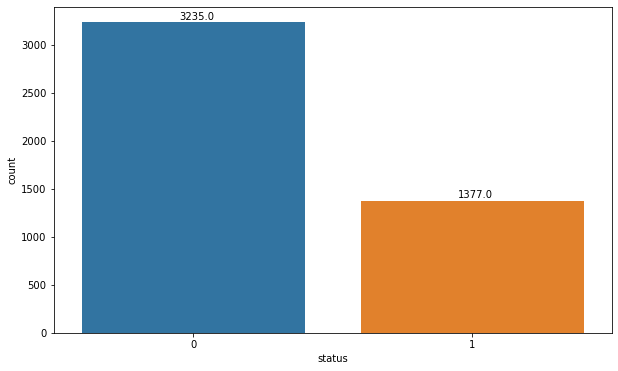

In [14]:
plt.figure(figsize = (10, 6))

our_plot = sns.countplot(x = 'status', data = data)

# Annotating the exact count on the top of the bar for each category 
# by iterating through the bars of 'our_plot' one by one
# passing the co-ordinates where annotation shall be done
# x co-ordinate = bars.get_x()+0.35
# y co-ordinate = bars.get_height()+30

for bars in our_plot.patches:
    our_plot.annotate('{:.1f}'.format(bars.get_height()), (bars.get_x()+0.35, (bars.get_height()+30)))
    
    

- The above plot shows that number of leads converted are significantly less than number of leads not converted which can be expected.
- The plot indicates that **~30%** (1377/4612) of leads have been converted.

**Let's check the distribution and outliers for numerical columns in the data**

### **Question 2: Provide observations for below distribution plots and box plots. (4 Marks)**

age
Skew : -0.72


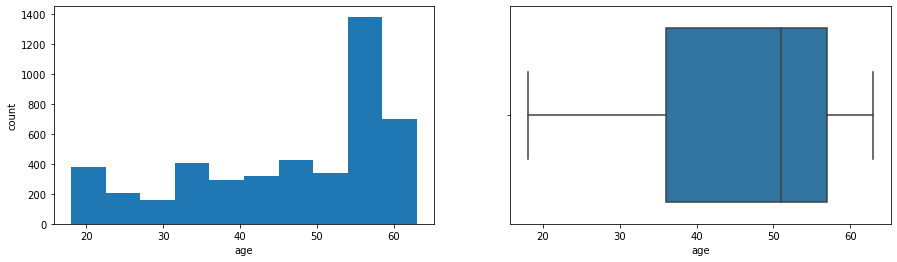

website_visits
Skew : 2.16


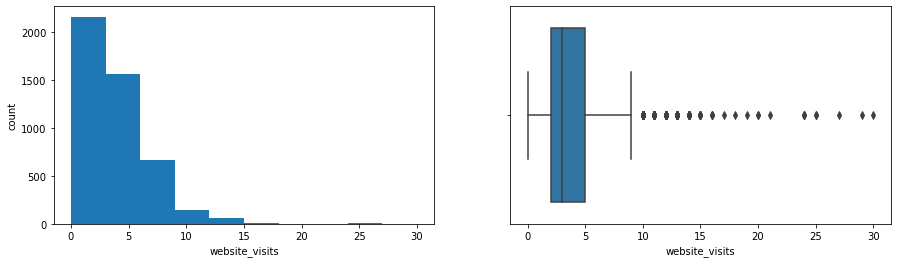

time_spent_on_website
Skew : 0.95


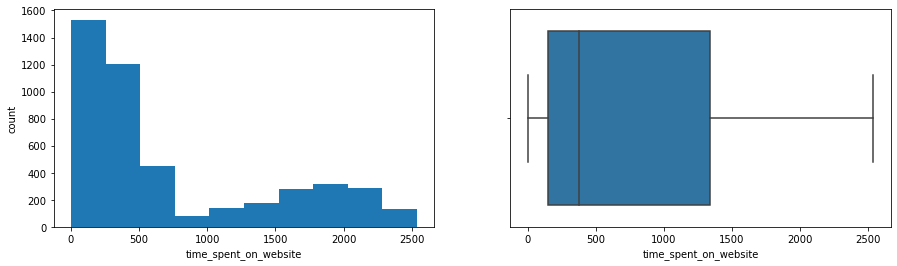

page_views_per_visit
Skew : 1.27


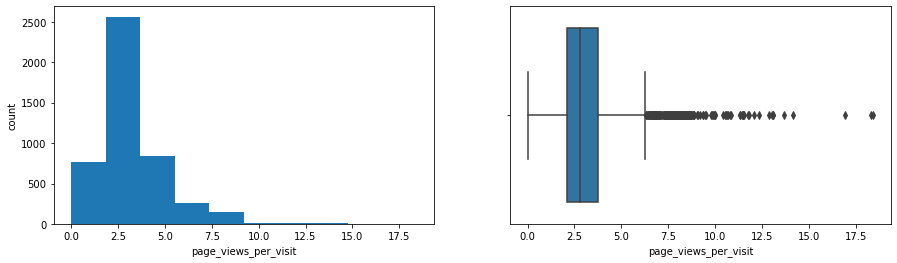

In [15]:
for col in ['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']:
    
    print(col)
    
    print('Skew :',round(data[col].skew(), 2))
    
    plt.figure(figsize = (15, 4))
    
    plt.subplot(1, 2, 1)
    
    data[col].hist(bins = 10, grid = False)
    plt.ylabel('count')
    plt.xlabel(f'{col}')
    
    plt.subplot(1, 2, 2)
    
    sns.boxplot(x = data[col])
    
    plt.show()
    

#### **Observations:**

1. The age distribution is left skewed and 50% people are less than 51 years in age. However, 25% people are over 57 years of age which indicates that as age increases, people tend to show gretaer inclination towards enhancing their skillset.
2. The website-visits distribution is right skewed and a few leads have even visited the website even more than 25 times (outliers as expected)!
3. The time spent on website seems to be right skewed with 50% leads spending less than 376 seconds and the other 50% spending in between 376 to 2537 seconds, which seems natural considering, people who are genuinely interested spend greater times scrolling through the website and vice-versa, thus formation of two concentrated groups is likely.
4. Distribution of 'Page views per visit' is also right skewed with a few outliers even above 15 page-views.

### **Bivariate Analysis**

**We are done with univariate analysis and data preprocessing. Let's explore the data a bit more with bivariate analysis.**

Leads will have different expectations from the outcome of the course and their current occupation may play a key role for them to take the program. Let's analyze it.

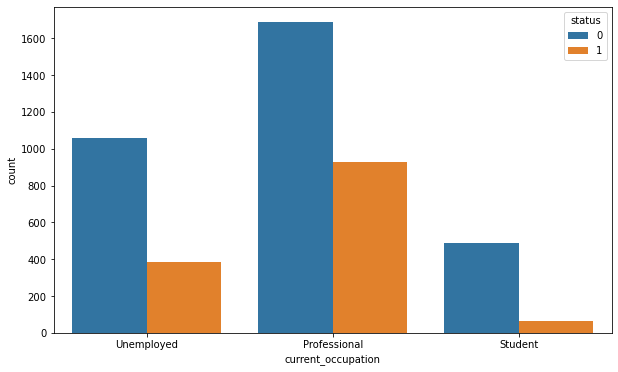

In [16]:
plt.figure(figsize = (10, 6))

sns.countplot(x = 'current_occupation', hue = 'status', data = data)

plt.show()


**Observations:**

- The plot shows that working professional leads are more likely to opt for a course offered by the organization and the students are least likely to be converted. 
- This shows that the currently offered programs are more oriented toward working professionals or unemployed personnel. The programs might be suitable for the working professionals who might want to transition to a new role or take up more responsibility in their current role. And also focused on skills that are in high demand making it more suitable for working professionals or currently unemployed leads.

**Age can also be a good factor to differentiate between such leads. Let's explore this.**

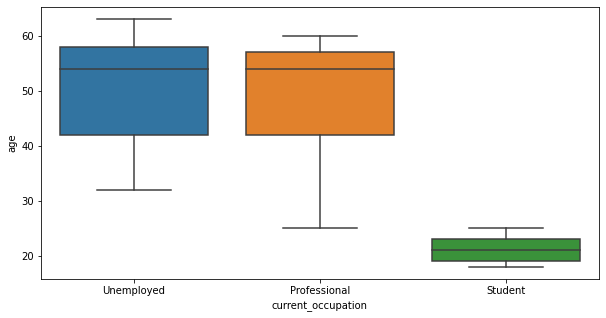

In [17]:
plt.figure(figsize = (10, 5))

sns.boxplot(data["current_occupation"], data["age"])

plt.show()


In [18]:
data.groupby(["current_occupation"])["age"].describe()


,count,mean,std,min,25%,50%,75%,max
current_occupation,,,,,,,,
Professional,2616.0,49.347477,9.890744,25.0,42.0,54.0,57.0,60.0
Student,555.0,21.144144,2.001114,18.0,19.0,21.0,23.0,25.0
Unemployed,1441.0,50.140180,9.999503,32.0,42.0,54.0,58.0,63.0


**Observations:**

* The range of age for students is 18 to 25 years.
* The range of age for professionals is 25 to 60 years.
* The range of age for unemployed leads is 32 to 63 years.
* The average age of working professionals and unemployed leads is almost 50 years, and that of a student is almost 21 years.

**The company's first interaction with leads should be compelling and persuasive. Let's see if the channels of the first interaction have an impact on the conversion of leads.**

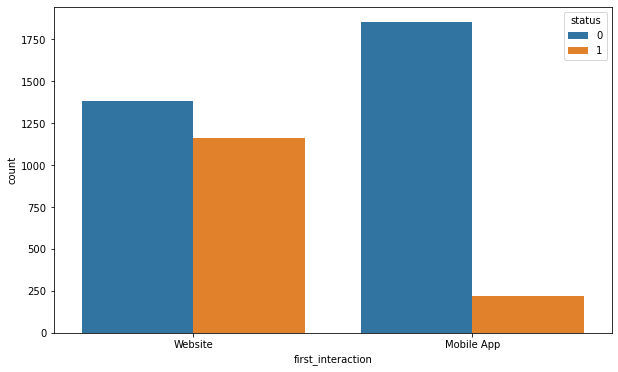

In [19]:
plt.figure(figsize = (10, 6))

sns.countplot(x = 'first_interaction', hue = 'status', data = data)

plt.show()


**Observations:**

* The website seems to be doing a good job as compared to mobile app as there is a huge difference in the number of conversions of the leads who first interacted with the company through website and those who interacted through mobile application.
* Majority of the leads who interacted through websites were converted to paid customers, while only a small number of leads, who interacted through mobile app, converted.

**We observed earlier that some leads spend more time on websites than others. Let's analyze if spending more time on websites results in conversion.**

### **Question 3:** 
- **Create a boxplot for variables 'status' and 'time_spent_on_website' (use sns.boxplot() function) (1 Mark)**
- **Provide your observations from the plot (2 Marks)**

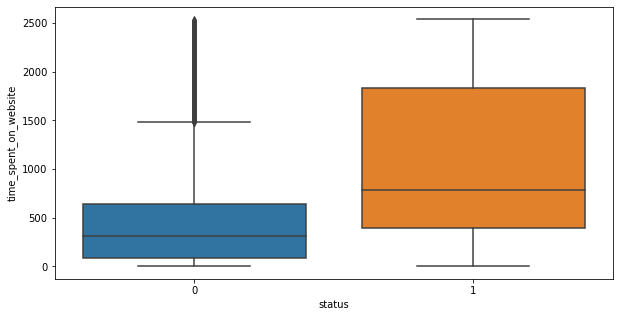

In [20]:
plt.figure(figsize = (10, 5))

# Write your code here

sns.boxplot(data['status'],data['time_spent_on_website'])


plt.show()


In [21]:
# Further, let us have a look at the exact figures before we provide insights on the plot

data.groupby(['status'])['time_spent_on_website'].describe()


,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
0,3235.0,577.420711,676.340484,0.0,88.0,317.0,646.0,2531.0
1,1377.0,1068.397967,780.856643,0.0,390.0,789.0,1829.0,2537.0


**Observations:**

1. Leads who spent greater time on the website are most likely to get converted, as is clear from the plot.
2. However, there are some outliers in 'status 0 plot' which suggests that a few leads spending more than 1500 sec on the website did not convert, which is natural. Genuinely interested leads will spend greater times to assess the features of the program. However, EdTech industry being a competitive market, there are many options to chose from, and hence, conversion is not guaranteed.
3. On an average, the time spent on website for non-converters is around 577 sec and that for converters is around 1068 seconds.
4. Further, those who convert, spend varying times, and almost everyone who spent between 650 sec and 1500 sec, converted, as is depicted in the plot. 
5. Factually speaking, the mid-range for time spent on website for leads that converted to paid customers is from 390 sec to 1829 sec (Q1 to Q3) which is much greater than that of non-converters (88 to 646 sec)



**People browsing the website or the mobile app are generally required to create a profile by sharing their details before they can access more information. Let's see if the profile completion level has an impact on lead coversion**

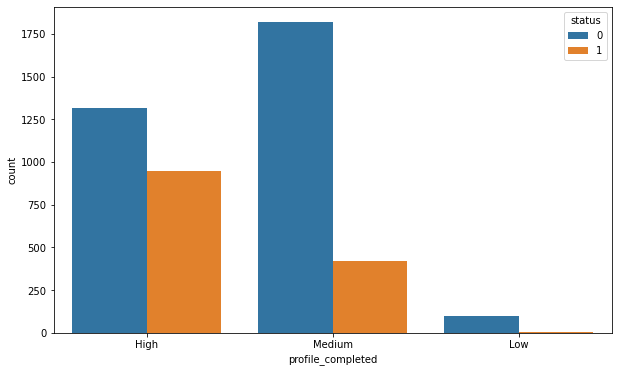

In [22]:
plt.figure(figsize = (10, 6))

sns.countplot(x = 'profile_completed', hue = 'status', data = data)

plt.show()


**Observations:**

* The leads whose profile completion level is high converted more in comparison to other levels of profile completion.
* The medium and low levels of profile completion saw comparatively very less conversions.
* The high level of profile completion might indicate a lead's intent to pursue the course which results in high conversion.

**Referrals from a converted lead can be a good source of income with a very low cost of advertisement. Let's see how referrals impact lead conversion status.**

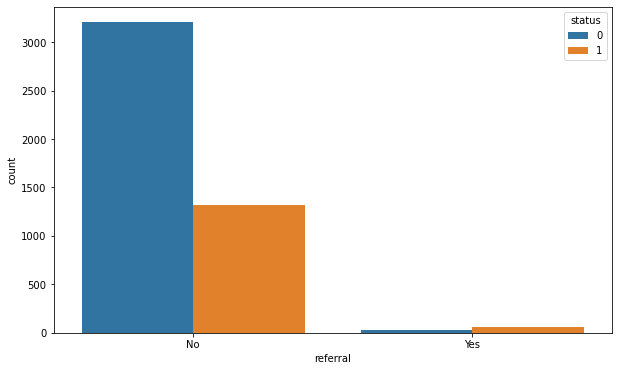

In [23]:
plt.figure(figsize = (10, 6))

sns.countplot(x = 'referral', hue = 'status', data = data)

plt.show()


**Observations:**
* There are a very less number of referrals but the conversion is high. 
* Company should try to get more leads through referrals by promoting rewards for existing customer base when they refer someone.

### **Question 4:** Write the code to plot the correlation heatmap and write your observations based on that. (4 Marks)

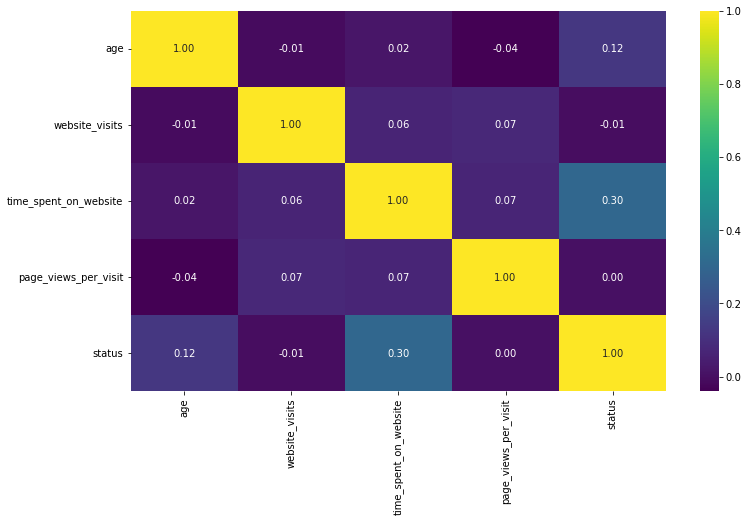

In [24]:
plt.figure(figsize = (12, 7))

sns.heatmap(data.corr(), annot = True, fmt = '.2f',cmap='viridis')

plt.show()


**Observations:**

* It is clear from the heatmap that the 'time spent on website' is positively correlated with the 'lead-status' which re-affirms the conclusion that we drew earlier- 'Greater the time spent on website, greater is the fraction of leads that get converted to customers'.

* Further, there exists a positive correlation (though weak) between 'age' and 'status',i.e. as age increases, greater number of people get converted to paid-customers. Company can factor customer's age in, while deploying marketing strategies owing to their greater inclination towards upskilling. 

* Also, time spent on website is very weakly correlated to page views per visit and and website visits, which seems natural.

## **Data preparation for modeling**

- We want to predict which lead is more likely to be converted.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test sets to be able to evaluate the model that we build on the train data.

In [25]:
# Separating the target variable and other variables
X = data.drop(columns = 'status')

Y = data['status']

In [26]:
# Creating dummy variables, drop_first=True is used to avoid redundant variables
# If only one out of 'n' can be 1 at a time, we can make out when the nth variable will be true based on 
# (n-1)th vars values

X = pd.get_dummies(X, drop_first = True)

In [27]:
# Splitting the data into train and test sets
#test_size=30% and random_state=1

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

**Checking the shape of the train and test data**

In [28]:
print("Shape of the training set: ", X_train.shape)   

print("Shape of the test set: ", X_test.shape)

print("Percentage of classes in the training set:")

print(y_train.value_counts(normalize = True))

print("Percentage of classes in the test set:")

print(y_test.value_counts(normalize = True))

Shape of the training set:  (3228, 16)
Shape of the test set:  (1384, 16)
Percentage of classes in the training set:
0    0.704151
1    0.295849
Name: status, dtype: float64
Percentage of classes in the test set:
0    0.695087
1    0.304913
Name: status, dtype: float64


## **Building Classification Models**

**Before training the model, let's choose the appropriate model evaluation criterion as per the problem at hand.**

### **Model evaluation criterion**

**Model can make wrong predictions as:**

1. Predicting a lead will not be converted to a paid customer but, in reality, the lead would have converted to a paid customer.
2. Predicting a lead will be converted to a paid customer but, in reality, the lead would have not converted to a paid customer. 

### **Which case is more important?** 

* If we predict that a lead will not get converted and the lead would have converted then the company will lose a potential customer. 

* If we predict that a lead will get converted and the lead doesn't get converted the company might lose resources by nurturing false-positive cases.

Losing a potential customer is a greater loss for the organization.

### **How to reduce the losses?**

* Company would want `Recall` to be maximized. The greater the Recall score, higher the chances of minimizing False Negatives. 

**Also, let's create a function to calculate and print the classification report and confusion matrix so that we don't have to rewrite the same code repeatedly for each model.**

In [29]:
# Function to print the classification report and get confusion matrix in a proper format

def metrics_score(actual, predicted):
    
    print(classification_report(actual, predicted))
    
    cm = confusion_matrix(actual, predicted)
    
    plt.figure(figsize = (8, 5))
    
    sns.heatmap(cm, annot = True,  fmt = '.2f', xticklabels = ['Not Converted', 'Converted'], yticklabels = ['Not Converted', 'Converted'],cmap='viridis')
    
    plt.ylabel('Actual')
    
    plt.xlabel('Predicted')
    
    plt.show()

### **Decision Tree**

### **Question 5:**

- **Fit the decision tree classifier on the training data (use random_state=7) (2 Marks)**
- **Check the performance on both training and testing datasets (use metrics_score function) (2 Marks)**
- **Write your observations (3 Marks)**

In [30]:
# Fitting the decision tree classifier on the training data

# We have already imported the algorithm: from sklearn.tree import DecisionTreeClassifier
# Let's go ahead and make our model named d_tree using default hyperparameters

d_tree =  DecisionTreeClassifier(random_state=7)

#Let's fit our model on the training data
        
d_tree.fit(X_train, y_train)


DecisionTreeClassifier(random_state=7)

**Let's check the performance on the training data**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



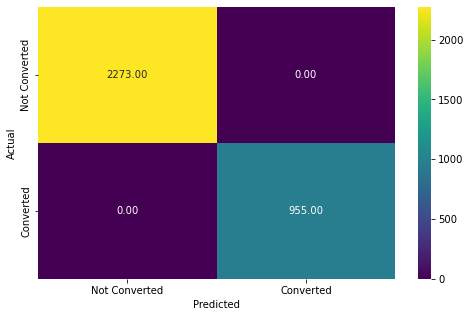

In [31]:
# Checking performance on the training data
y_pred_train1 = d_tree.predict(X_train)

#Call the function to generate the classification report and confusion matrix
metrics_score(y_train, y_pred_train1)

**Observations:**

1. The Decision tree is giving a 100% score for the performance metric on the training dataset. It seems that it has learnt the data completely and is overfitting with perfect scores for the entire performance metric.


**Let's check the performance on test data to see if the model is overfitting.**

              precision    recall  f1-score   support

           0       0.87      0.86      0.87       962
           1       0.69      0.70      0.70       422

    accuracy                           0.81      1384
   macro avg       0.78      0.78      0.78      1384
weighted avg       0.81      0.81      0.81      1384



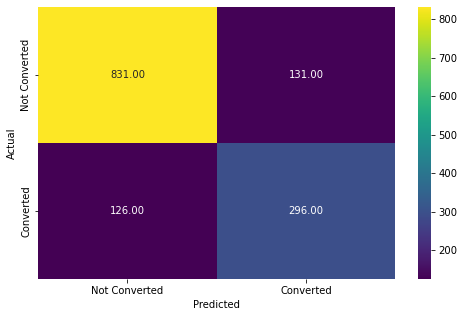

In [32]:
# Checking performance on the testing data
y_pred_test1 = d_tree.predict(X_test)

#Call the function to generate the classification report and confusion matrix
metrics_score(y_test, y_pred_test1)

**Observations:**

1. The Decision Tree works well on the training data but not so well on the test data as the recall is 0.70 in comparison to 1 for the training dataset, i.e., the Decision Tree is overfitting the training data as we had inferred earlier.

2. The **'recall'** on the test data suggests that there's a 30% (1-0.70) chance- we predict that a lead will not get converted and the lead will actually convert, and we might **risk losing a potential customer.**

3. Similarly, the **'precision'** on the test data suggests that there's a 31% chance- we predict that a lead will get converted and the lead doesn't get converted, and the company might **lose resources by nurturing false-positive cases.**

4. The overall accuracy score for the metric is 81% on the test data compared to 100% on the training data.

5. Owing to such heavy difference in the performance of the model on the training and test data, we can say that the model is overfitting and under-performing.

**Let's try hyperparameter tuning using GridSearchCV to find the optimal max_depth** to reduce overfitting of the model. We can tune some other hyperparameters as well.

### **Decision Tree - Hyperparameter Tuning**

We will use the class_weight hyperparameter with the value equal to {0: 0.3, 1: 0.7} which is approximately the opposite of the imbalance in the original data. 

**This would tell the model that 1 is the important class here.**

In [33]:
# Choose the type of classifier 
d_tree_tuned = DecisionTreeClassifier(random_state = 7, class_weight = {0: 0.3, 1: 0.7})

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 10), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
d_tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=3, min_samples_leaf=5, random_state=7)

We have tuned the model and fit the tuned model on the training data. Now, **let's check the model performance on the training and testing data.**

### **Question 6:**
- **Check the performance on both training and testing datasets (4 Marks)**
- **Compare the results with the results from the decision tree model with default parameters and write your observations (4 Marks)**

              precision    recall  f1-score   support

           0       0.94      0.77      0.85      2273
           1       0.62      0.88      0.73       955

    accuracy                           0.80      3228
   macro avg       0.78      0.83      0.79      3228
weighted avg       0.84      0.80      0.81      3228



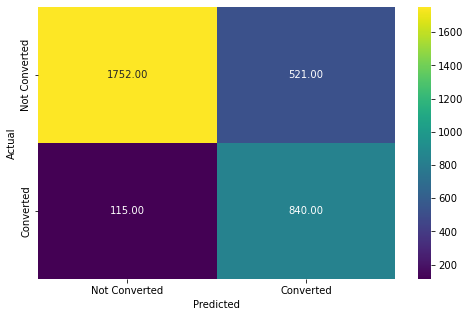

In [34]:
# Checking performance on the training data
y_pred_train2 = d_tree_tuned.predict(X_train)

#Call the function to generate the classification report and confusion matrix
metrics_score(y_train, y_pred_train2)


**Observations:**

1. In comparison with the model with default hyperparameters, the performance of tuned-hyperparameter model on the training set has gone down significantly. The Recall scores are now at 88%, and precion at 62% compared to 100% scores observed for the untuned model.

2. The **'recall'** on the training data suggests that there's a 12% chance- we predict that a lead will not get converted and the lead will actually convert, and we might **risk losing a potential customer.**

3. Similarly, the **'precision'** on the training data suggests that there's a 38% chance- we predict that a lead will get converted and the lead doesn't get converted, and the company might **lose resources by nurturing false-positive cases.**

4. As we were trying to reduce overfitting on the training data (as for our untuned hyperparameter model), this makes sense provided we get to be successful in improving the performance of the model on the Test data. Let us find out.

**Let's check the model performance on the testing data**

              precision    recall  f1-score   support

           0       0.93      0.77      0.84       962
           1       0.62      0.86      0.72       422

    accuracy                           0.80      1384
   macro avg       0.77      0.82      0.78      1384
weighted avg       0.83      0.80      0.80      1384



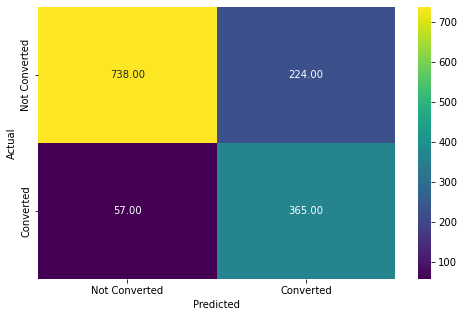

In [35]:
# Checking performance on the testing data
y_pred_test2 = d_tree_tuned.predict(X_test)

metrics_score(y_test, y_pred_test2)

**Observations:**

1. Comparing the performance of the tuned-hyperparameter model on **training and test datasets**, it can be said that the model is no more overfitting the data and is giving approximately same performance on both train and test datasets. The Recall score, however, has decreased slightly (0.86 from 0.88) and precision, accuracy remain the same.

2. Comparing the model performance with the earlier model of **default parameters**, it seems that the results have significantly improved :

   (a) On the training dataset, the earlier model was overfitting with a 100% score for the entire performance metric.
   However, this model deteriorates the performance on training dataset. 
   
   (b) On the test set:-
   
          (i) The tuned model shows improvement in 'recall' score (0.86 vs earlier 0.70), which indicates that the               chances of not detecting a potential customer and thereby losing him, have gone down from 30% to 14%. 
          
          (ii) Precision score, however, has gone down from 69% to 62% which indicates that the number of false                 positives will increase for this model,i.e. our model will predict that some leads will convert but they               won't leading to wastage of resources and cost over them.
          
3. Overall, the model performance can be said to be significantly improved on the test dataset compared with the model of default hyperparameters over the important parameter- 'recall'.

**Let's visualize the tuned decision tree** and observe the decision rules:

### **Question 7: Write your observations from the below visualization of the tuned decision tree. (5 Marks)**

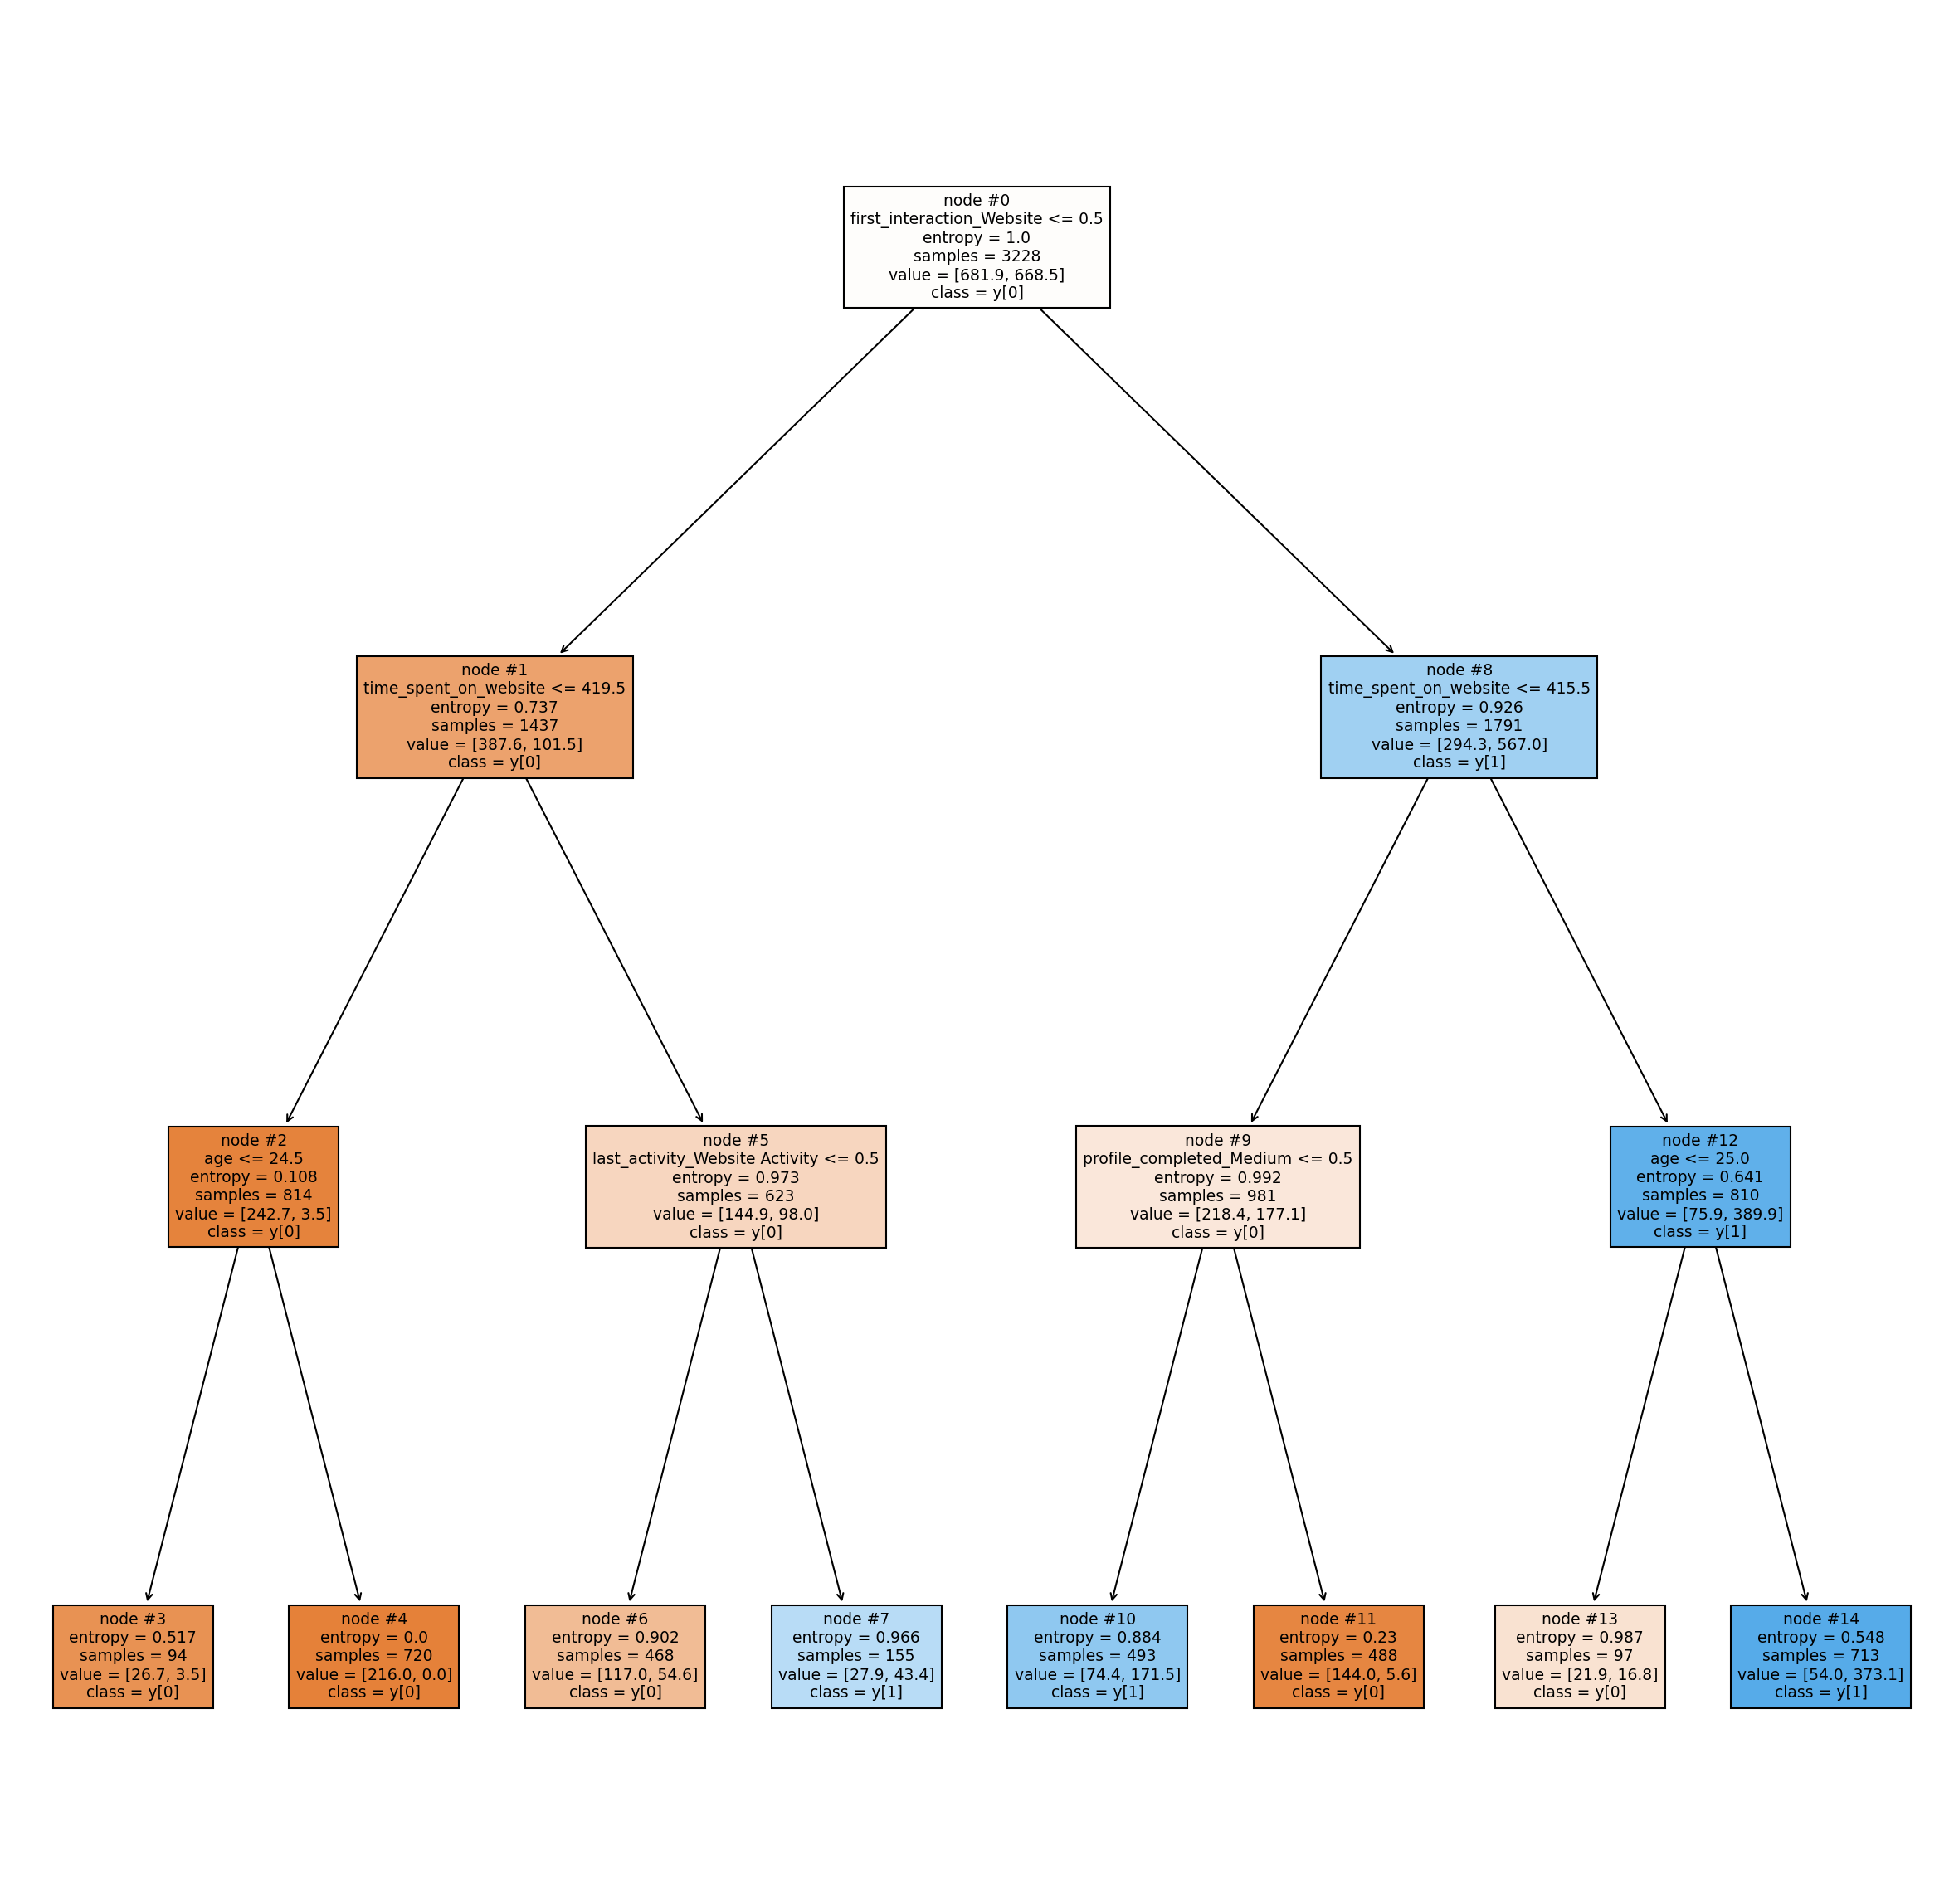

In [36]:
features = list(X.columns)

plt.figure(figsize = (20, 20),dpi=150)

tree.plot_tree(d_tree_tuned, feature_names = features, filled = True, fontsize = 9, node_ids = True, class_names = True)

plt.show()

**Note:** Blue leaves represent the converted leads, i.e., **y[1]**, while the orange leaves represent the not converted leads, i.e., **y[0]**. Also, the more the number of observations in a leaf, the darker its color gets.

**Observations:**

1. First interaction through the website, time spent on the website, an individual's age, profile completion level and last  interaction activity seem to be the most important features in determining a lead's likelihood of getting converted to a paid customer.

2. The model suggests that individuals interacting through the website for the first time, spending greater time accessing it's content and belonging to older age-groups(>25 yrs), are most likely to convert into paid-customers. This suggests that the website makes a greater impact and engages customers for a greater time and as the course's aim is aligned to their career-goals, they get converted.

3. On similar lines, it is evident from the model that younger individuals (<25 yrs) interacting first through mobile app who also spend lesser time (<419 sec) on web are less likely to convert.

4. A lead, who spends less than 415 sec on website, and also has low level of profile completion status, is less likely to convert. 

5. Further, even if the first interaction has been through a mobile app, if the time spent on websites is more than ~420 seconds and the last engagement has been through the website, the lead is more likely to convert. This might indicate that the website is equipped with efficient chatbots/ front-end interface to result in greater satisfaction and higher conversion.

6. Even if the lead has first interacted through website and time spent on website is greater than 415 seconds, younger leads are less likely to convert. On the contrary, leads first interacting through mobile, spending lesser time(<420 sec), are less likely to convert even if they are of older ages (>25 yrs).



**Let's look at the feature importance** of the tuned decision tree model

In [37]:
# Importance of features in the tree building

print (pd.DataFrame(d_tree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))


                                     Imp
time_spent_on_website           0.348142
first_interaction_Website       0.327181
profile_completed_Medium        0.239274
age                             0.063893
last_activity_Website Activity  0.021511
website_visits                  0.000000
page_views_per_visit            0.000000
current_occupation_Student      0.000000
current_occupation_Unemployed   0.000000
profile_completed_Low           0.000000
last_activity_Phone Activity    0.000000
print_media_type1_Yes           0.000000
print_media_type2_Yes           0.000000
digital_media_Yes               0.000000
educational_channels_Yes        0.000000
referral_Yes                    0.000000


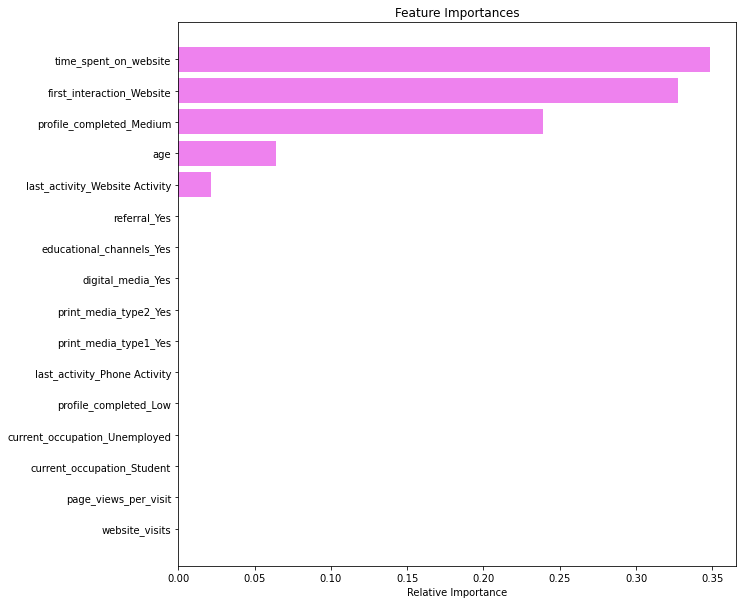

In [38]:
# Plotting the feature importance
importances = d_tree_tuned.feature_importances_

indices = np.argsort(importances)

plt.figure(figsize = (10, 10))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [features[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

**Observations:**
- **Time spent on the website and first_interaction_website are the most important features** **followed by profile_completed, age, and last_activity**.
- **The rest of the variables have no impact in this model, while deciding whether a lead will be converted or not**.

Now, let's build another model - **a random forest classifier.**

### **Random Forest Classifier**

### **Question 8:** 
- **Fit the random forest classifier on the training data (use random_state = 7) (2 Marks)**
- **Check the performance on both training and testing data (use metrics_score function) (2 Marks)**
- **Write your observations (3 Marks)**

In [39]:
# Fitting the random forest tree classifier on the training data
rf_estimator = RandomForestClassifier(random_state=7)

rf_estimator.fit(X_train,y_train)

RandomForestClassifier(random_state=7)

**Let's check the performance of the model on the training data**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



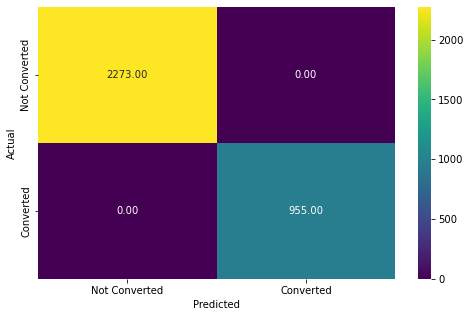

In [40]:
# Checking performance on the training data
y_pred_train3 = rf_estimator.predict(X_train)

metrics_score(y_train,y_pred_train3)

**Observations:**

1. The Random Forest is giving a 100% score for all metrics on the training dataset. It seems that it has learnt the data completely and is overfitting with perfect scores for the entire performance metric.

**Let's check the performance on the testing data**

              precision    recall  f1-score   support

           0       0.87      0.92      0.90       962
           1       0.80      0.69      0.74       422

    accuracy                           0.85      1384
   macro avg       0.84      0.81      0.82      1384
weighted avg       0.85      0.85      0.85      1384



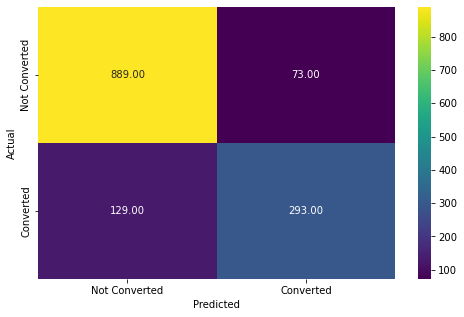

In [41]:
# Checking performance on the testing data
y_pred_test3 = rf_estimator.predict(X_test)

metrics_score(y_test,y_pred_test3)

**Observations:**

1. We can see that the performance of the model has deteriorated on test data. The overall accuracy of the model has come down from 100% to 85% which affirms the fact that the model was overfitting the training data.

2. The **'recall'** on the test data suggests that there's a 31% (1-0.69) chance that we will miss out on a potential customer because the model will report it as a False Negative, and we might **risk losing a potential customer.** 

3. Similarly, the **'precision'** on the test data suggests that there's a 20% chance that a lead will not get converted into a paid-customer owing to the False positive prediction by our model and the company might **lose resources.** 

4. Further, the performance of **Random Forest model w.r.t Decision Trees** (for default hyperparameters) on test dataset has improved for Precision score (0.80 vs 0.68) and increased marginally for recall (0.69 vs 0.68). Also, overall accuracy score has improved to 85% from 80%.

5. Thus, the Random Forest model is performing better than Decision Trees with default hyperparameters.

**Let's see if we can get a better model by tuning the random forest classifier**

### **Random Forest Classifier - Hyperparameter Tuning**

Let's try **tuning some of the important hyperparameters of the Random Forest Classifier**. 

We will **not** tune the `criterion` hyperparameter as we know from hyperparameter tuning for decision trees that `entropy` is a better splitting criterion for this data.

In [42]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 7)

# Grid of parameters to choose from
parameters = {"n_estimators": [100, 110, 120],
    "max_depth": [5, 6, 7],
    "max_features": [0.8, 0.9, 1]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

In [43]:
# Fitting the best algorithm to the training data
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=6, max_features=0.8,
                       n_estimators=110, random_state=7)

              precision    recall  f1-score   support

           0       0.91      0.92      0.91      2273
           1       0.80      0.78      0.79       955

    accuracy                           0.88      3228
   macro avg       0.86      0.85      0.85      3228
weighted avg       0.88      0.88      0.88      3228



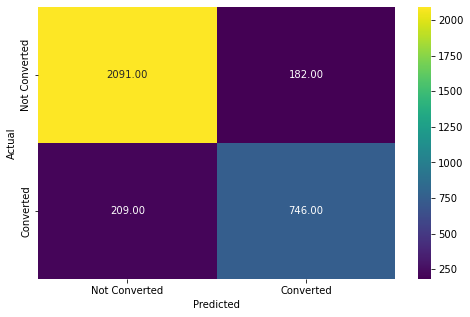

In [44]:
# Checking performance on the training data
y_pred_train4 = rf_estimator_tuned.predict(X_train)

metrics_score(y_train, y_pred_train4)

**Observations:**
- We can see that after hyperparameter tuning, the model is performing poorly on the train data as well.
- We can try adding some other hyperparameters and/or changing values of some hyperparameters to tune the model and see if we can get better performance.

**Note:** **GridSearchCV can take a long time to run** depending on the number of hyperparameters and the number of values tried for each hyperparameter. **Therefore, we have reduced the number of values passed to each hyperparameter.** 

### **Question 9:**
- **Tune the random forest classifier using GridSearchCV (4 Marks)**
- **Check the performance on both training and testing datasets (2 Marks)**
- **Compare the results with the results from the random forest model with default parameters and write your observations (2 Marks)**

**Note:** The below code might take some time to run depending on your system's configuration.

In [45]:
# Choose the type of classifier 
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 7)

# Grid of parameters to choose from
parameters = {"n_estimators": [110, 120],
    "max_depth": [6, 7],
    "min_samples_leaf": [20, 25],
    "max_features": [0.8, 0.9],
    "max_samples": [0.9, 1],
    "class_weight": ["balanced",{0: 0.3, 1: 0.7}]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search on the training data using scorer=scorer and cv=5
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Save the best estimator to variable rf_estimator_tuned
rf_estimator_tuned = grid_obj.best_estimator_

#Fit the best estimator to the training data
rf_estimator_tuned.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=6, max_features=0.8, max_samples=0.9,
                       min_samples_leaf=25, n_estimators=120, random_state=7)

**Let's check the performance of the tuned model**

              precision    recall  f1-score   support

           0       0.94      0.83      0.88      2273
           1       0.68      0.87      0.76       955

    accuracy                           0.84      3228
   macro avg       0.81      0.85      0.82      3228
weighted avg       0.86      0.84      0.84      3228



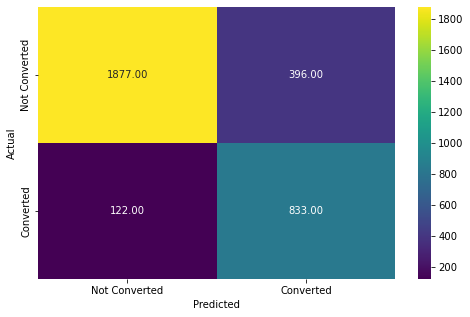

In [46]:
# Checking performance on the training data
y_pred_train5 = rf_estimator_tuned.predict(X_train)

metrics_score(y_train, y_pred_train5)

**Observations:**

1. As compared to Random Forest Model with default hyperparameters, the performance of this model on training data has deteriorated. The precision and recall scores have come down to 0.68 and 0.87 from 1 each.

2. Further, w.r.t the previous tuned hyperparameter model, Precision scores have dipped from 80% to 68%, accuracy has dipped from 88% to 84%. However, the recall seems to improve significantly to 87% from 78%, which is a considerable improvement.

**Let's check the model performance on the test data**

              precision    recall  f1-score   support

           0       0.93      0.83      0.87       962
           1       0.68      0.85      0.76       422

    accuracy                           0.83      1384
   macro avg       0.80      0.84      0.82      1384
weighted avg       0.85      0.83      0.84      1384



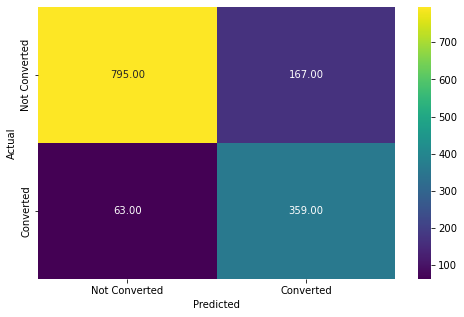

In [47]:
# Checking performance on the test data
y_pred_test5 = rf_estimator_tuned.predict(X_test)

metrics_score(y_test, y_pred_test5)

**Observations:**

1. Comparing the performance of the tuned-hyperparameter model on **training and test datasets**, it can be said that the model is no more overfitting the data and is giving approximately similar performance on both train and test datasets. The Recall score, however, has decreased slightly (0.85 from 0.87) and precision, accuracy remain almost the same.


2. Comparing the model performance with the earlier model of **default parameters**, it seems that the results have significantly improved (for recall scores, in particular):

   (a) On the training dataset, the earlier model was overfitting with a 100% score for the entire performance metric.    Howeever, the scores for recall and precision have come down to 0.87 and 0.68 from 1.0 for each.
   
   (b) On the test set:-
   
          (i) The tuned model shows improvement in 'recall' score (0.85 vs 0.69), which indicates that the                       chances of not detecting a potential customer and thereby losing him, have gone down from 31% to 15%, which           is more important for us from the business perspective. 
          
          (ii) Precision score, however, has gone down from 80% to 68% which indicates that the number of false                 positives will increase for this model,i.e. our model will predict that some leads will convert but they               won't leading to wastage of resources and cost over them. 

3. As the recall metric has greater importance for our business use case, we can say that the model is performing better than the earlier models.

**One of the drawbacks of ensemble models is that we lose the ability to obtain an interpretation of the model. We cannot observe the decision rules for random forests the way we did for decision trees. So, let's just check the feature importance of the model.**

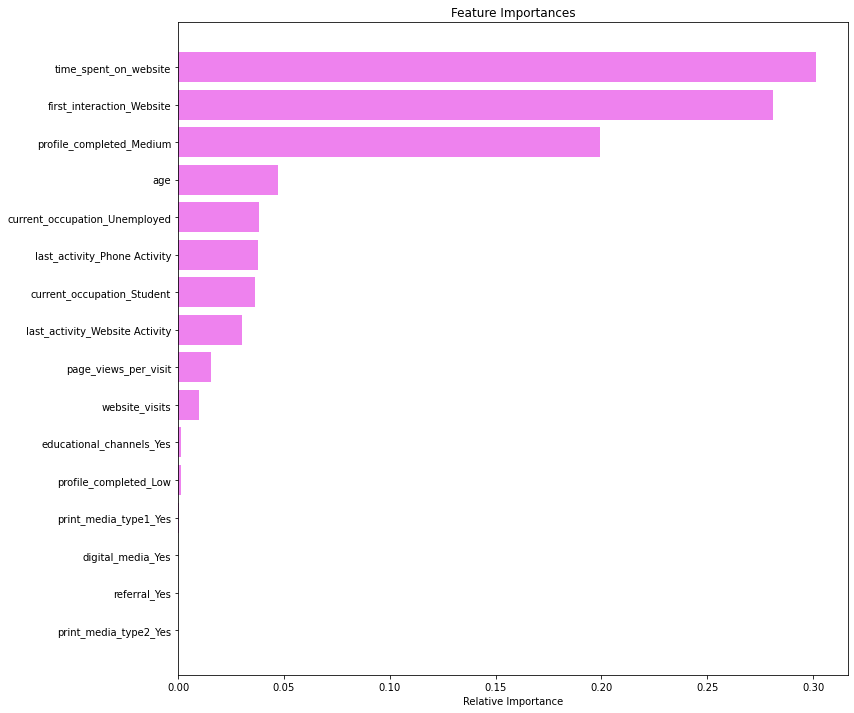

In [48]:
importances = rf_estimator_tuned.feature_importances_

indices = np.argsort(importances)

feature_names = list(X.columns)

plt.figure(figsize = (12, 12))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

**Observations:**
- Similar to the decision tree model, **time spent on website, first_interaction_website, profile_completed, and age are the top four features** that help distinguish between not converted and converted leads.
- Unlike the decision tree, **the random forest gives some importance to other variables like occupation, page_views_per_visit, as well.** This implies that the random forest is giving importance to more factors in comparison to the decision tree.

## **Conclusion and Recommendations**

### **Question 10:**

**Write your conclusions on the key factors that drive the conversion of leads and write your recommendations to the business on how can they improve the conversion rate. (10 Marks)**

### **Conclusions:**

1. The best model we have got so far is the tuned random forest model which is giving nearly ~ 85% recall for class 1 on the test data and an accuracy of 83%.
2. The company should use this model to have an idea of which lead is going to convert and act accordingly.
3. Time spent on website, first_interaction_website, profile_completed, and age seem to be the most important features determining conversion of leads.


### **Business Recommendations**

1. As observed, the 'Time spent on website' is the most important driver of lead conversion. Greater the time spent browsing through the website's content, clearer is the intention of the lead to convert, which seems natural. The organisation may deploy a time-based chatbot/live chat which starts offering help in providing specific details of upcoming programs or connects to a representative for further enquiry.

2. Interacting with the ExtraaLearn's website for the first time plays a major role in conversion. It creates a fine impression on leads as is clear from greater lead conversion ratio which should be maintained in the future. The company should ,however, also make efforts to improve the mobile application and improve user experience therein, to increase its contribution towards conversion.

3. Higher profile completion status reflects greater intent of leads in persuing the programs, and hence greater conversion. The company may, design a routine for its' sales representatives to address any concerns that these leads might have through emails/phone calls/live chat and leverage from it.

4. Age of the lead is also an important factor for conversion. This may be due to the fact that the programs offered, align with the skills in-demand for working professionals/ unemployed jobseekers. Company can also find out an individual's aspirations by trackin his clicks on the website and match him up to one of their offered programs. Pop-ups about the career handholding options can be thought about, to further increase conversions. 

5. It has also been observed that even though the number of referrals are low, their conversion rate is very high. So, the company can employ reward based strategies for exisiting customers whenever they refer someone. It can encourage customers to refer more and the company can reap its benefit by having greater lead conversions.

6. Further, the last interaction through the website has positively driven the lead conversion. It may be because, the live chat with a representative/ profile updation has been effective in decision making in favour of the program. We also observed that, on an average, the last interaction has been mostly through emails. Thus, the company can share its newsletters/offer coupons/program reviews through emails to create a sound impression to make them enroll in it's programs.

7. The company can devise a strategy to keep track of frequently accessed webpages by visitors to gauge their interests and include most lucrative information over there. The first 2-3 pages should peak on the sales pitch and frequently sought out content.

8. Even though visitor traffic is being redirected from other educational websites/programs, lead conversion of students is very low. The company can explore program designs intended to attract younger student audience for achieving their academic goals/ nurture their interests - to increase their conversions.

9. Since most of the leads who convert are professionals/unemployed people. And the average age of such personnel visiting the website is around 50 years, the company can also come up with something like a 'Family pack' offer, incentivising member enrollment from the same family at a discounted rate. It can ensure continued patronage of existing customers while increasing the customer base. Since words spread rapidly between families, it can also lead to increase referrals and so on.

10. The recommended model predicts the conversion of a lead with 85% recall. There is still a 15% chance that we won't be able to predict conversion into a paid customer for a future lead. The business should make a note of it during allocation of resources/ model implementation.
